In [78]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import balanced_accuracy_score



In [79]:
file = (r"C:\Users\jkobe\jupyter\Jun9Act\housing.csv")
df = pd.read_csv(file)
df

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,Y house price of unit area
0,1,2012.92,32.0,84.88,10,37.9
1,2,2012.92,19.5,306.59,9,42.2
2,3,2013.58,13.3,561.98,5,47.3
3,4,2013.50,13.3,561.98,5,54.8
4,5,2012.83,5.0,390.57,5,43.1
...,...,...,...,...,...,...
409,410,2013.00,13.7,4082.01,0,15.4
410,411,2012.67,5.6,90.46,9,50.0
411,412,2013.25,18.8,390.97,7,40.6
412,413,2013.00,8.1,104.81,5,52.5


In [80]:
df.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,Y house price of unit area
count,414.00,414.00,414.00,414.00,414.00,414.00
mean,207.50,2013.15,17.71,1083.89,4.09,37.98
std,119.66,0.28,11.39,1262.11,2.95,13.61
min,1.00,2012.67,0.00,23.38,0.00,7.60
25%,104.25,2012.92,9.03,289.32,1.00,27.70
50%,207.50,2013.17,16.10,492.23,4.00,38.45
75%,310.75,2013.42,28.15,1454.28,6.00,46.60
max,414.00,2013.58,43.80,6488.02,10.00,117.50


In [81]:
df.shape

(414, 6)

In [82]:
df.dtypes

No                                       int64
transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
Y house price of unit area             float64
dtype: object

In [83]:
df = df.rename(columns = {
       'No': 'no'
    , 'transaction date': 'transaction_date'
    , 'house age': 'house_age'
    , 'distance to the nearest MRT station': 'mrt_distance'
    , 'number of convenience stores': 'convenience_stores'
    , 'Y house price of unit area': 'house_price'
    ,
})
df

,no,transaction_date,house_age,mrt_distance,convenience_stores,house_price
0,1,2012.92,32.0,84.88,10,37.9
1,2,2012.92,19.5,306.59,9,42.2
2,3,2013.58,13.3,561.98,5,47.3
3,4,2013.50,13.3,561.98,5,54.8
4,5,2012.83,5.0,390.57,5,43.1
...,...,...,...,...,...,...
409,410,2013.00,13.7,4082.01,0,15.4
410,411,2012.67,5.6,90.46,9,50.0
411,412,2013.25,18.8,390.97,7,40.6
412,413,2013.00,8.1,104.81,5,52.5


In [84]:
df.count()

no                    414
transaction_date      414
house_age             414
mrt_distance          414
convenience_stores    414
house_price           414
dtype: int64

In [85]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [86]:
df.isna().sum()

no                    0
transaction_date      0
house_age             0
mrt_distance          0
convenience_stores    0
house_price           0
dtype: int64

In [87]:
df.count()

no                    414
transaction_date      414
house_age             414
mrt_distance          414
convenience_stores    414
house_price           414
dtype: int64

In [88]:
corr_matrix = df.corr()
price_corr = corr_matrix['house_price']

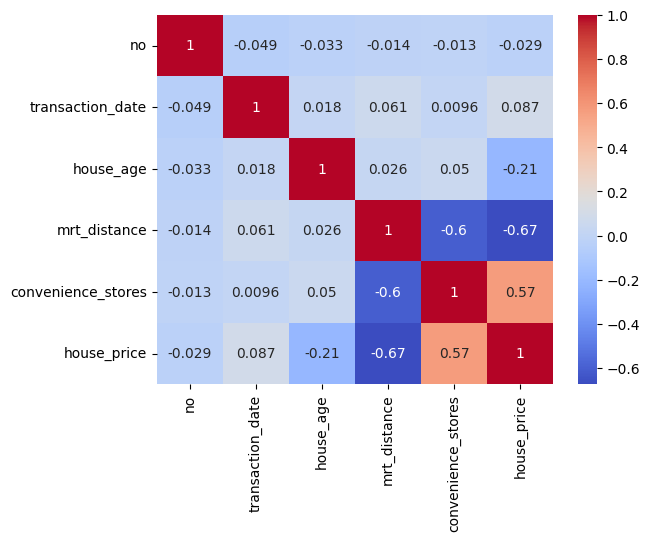

In [89]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()


 Regression Equation of house_age:
House Price =  42.43469704626289 + -0.2514884190853454 * house_age

 R-squared for house_age: 0.04433848097791171


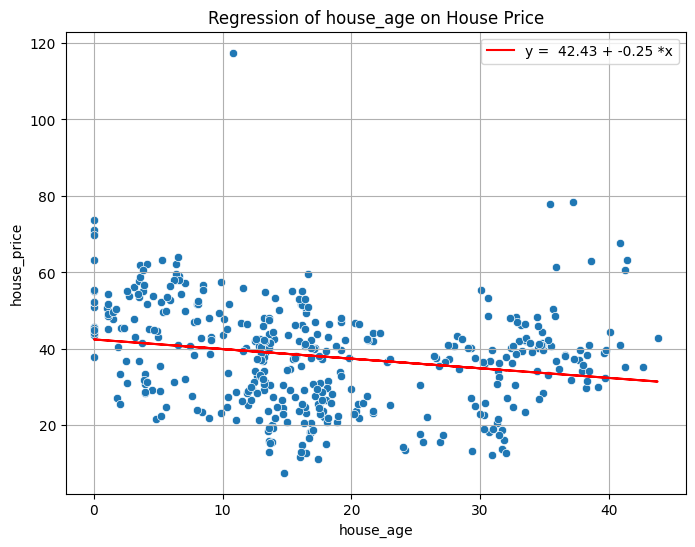

In [90]:
variables = ['house_age']

for var in variables:
        X = df[[var]]
        Y = df['house_price']

        model = LinearRegression().fit(X, Y)
        predictions = model.predict(X)

        plt.figure(figsize = (8,6))
        sns.scatterplot(data = df, x = var, y = 'house_price')

        line = model.intercept_ + model.coef_[0] * df[var]
        plt.plot(df[var], line, 'r', label = f'y = {model.intercept_: .2f} + {model.coef_[0]: .2f} *x')

        print(f"\n Regression Equation of {var}:")
        print('House Price = ', model.intercept_, '+', model.coef_[0], '*', var)
        print(f"\n R-squared for {var}: {r2_score(Y, predictions)}")

        plt.legend()
        plt.title(f'Regression of {var} on House Price')
        plt.grid(True)
        plt.show()


 Regression Equation of mrt_distance:
House Price =  45.851427057774984 + -0.007262051618149456 * mrt_distance

 R-squared for mrt_distance: 0.45375427891826703


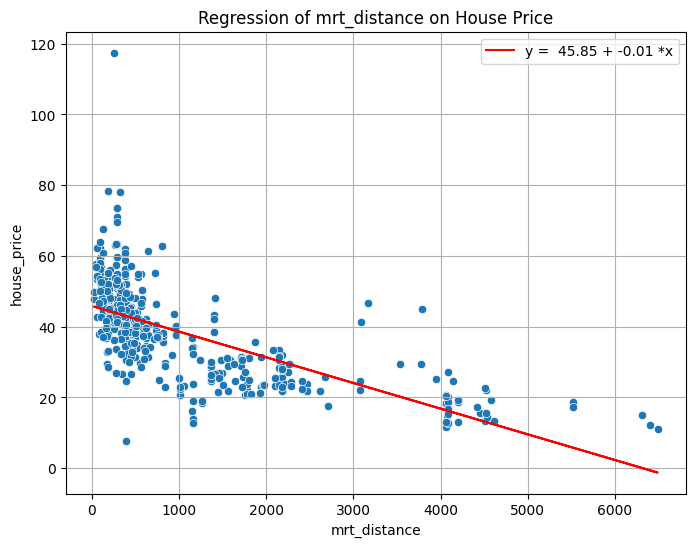

In [91]:
variables = ['mrt_distance']

for var in variables:
        X = df[[var]]
        Y = df['house_price']

        model = LinearRegression().fit(X, Y)
        predictions = model.predict(X)

        plt.figure(figsize = (8,6))
        sns.scatterplot(data = df, x = var, y = 'house_price')

        line = model.intercept_ + model.coef_[0] * df[var]
        plt.plot(df[var], line, 'r', label = f'y = {model.intercept_: .2f} + {model.coef_[0]: .2f} *x')

        print(f"\n Regression Equation of {var}:")
        print('House Price = ', model.intercept_, '+', model.coef_[0], '*', var)
        print(f"\n R-squared for {var}: {r2_score(Y, predictions)}")

        plt.legend()
        plt.title(f'Regression of {var} on House Price')
        plt.grid(True)
        plt.show()


 Regression Equation of convenience_stores:
House Price =  27.181104781472428 + 2.637653463404374 * convenience_stores

 R-squared for convenience_stores: 0.32604660851305045


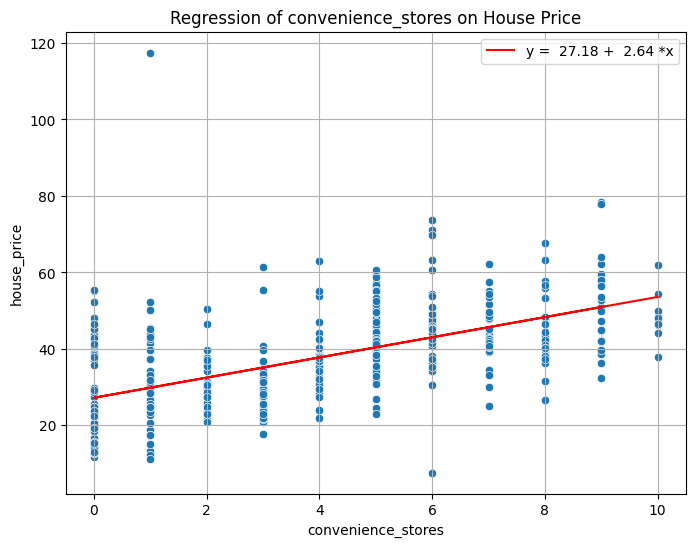

In [92]:
variables = ['convenience_stores']

for var in variables:
        X = df[[var]]
        Y = df['house_price']

        model = LinearRegression().fit(X, Y)
        predictions = model.predict(X)

        plt.figure(figsize = (8,6))
        sns.scatterplot(data = df, x = var, y = 'house_price')

        line = model.intercept_ + model.coef_[0] * df[var]
        plt.plot(df[var], line, 'r', label = f'y = {model.intercept_: .2f} + {model.coef_[0]: .2f} *x')

        print(f"\n Regression Equation of {var}:")
        print('House Price = ', model.intercept_, '+', model.coef_[0], '*', var)
        print(f"\n R-squared for {var}: {r2_score(Y, predictions)}")

        plt.legend()
        plt.title(f'Regression of {var} on House Price')
        plt.grid(True)
        plt.show()

In [93]:
pd.set_option('display.precision', 2)
print("1. MRT")
print("2. House Age")
print("3. Convenience Stores")
feature = input("Select feature:")
if feature == '1':
    print("Enter MRT Distance:")
    mrt = input()
    my_float = float(mrt)
    price =  45.851427057774984 + -0.007262051618149456 * my_float
    houseprice = round(price, 2)
    print("House Price ", houseprice)
elif feature == '2':
    print("Enter House Age:")
    age = input()
    my_float = float(age)
    price =   42.43469704626289 + -0.2514884190853454 * my_float
    houseprice = round(price, 2)
    print("House Price ", houseprice)
elif feature == '3':
    print("Enter Number of Convenience Stores:")
    store = input()
    my_float = float(store)
    price =  27.181104781472428 + 2.637653463404374 * my_float
    houseprice = round(price, 2)
    print("House Price ", houseprice)
else:
    print("Please choose an existing option.")

1. MRT
2. House Age
3. Convenience Stores
Please choose an existing option.


Multiple Linear Regression
--------------------------------

In [94]:
print(price_corr)

no                   -0.03
transaction_date      0.09
house_age            -0.21
mrt_distance         -0.67
convenience_stores    0.57
house_price           1.00
Name: house_price, dtype: float64


house_price =  42.98      +  1.30* house_age      + -0.25* mrt_distance       + -0.01* convenience_stores
R-squared: 0.5410632980005723


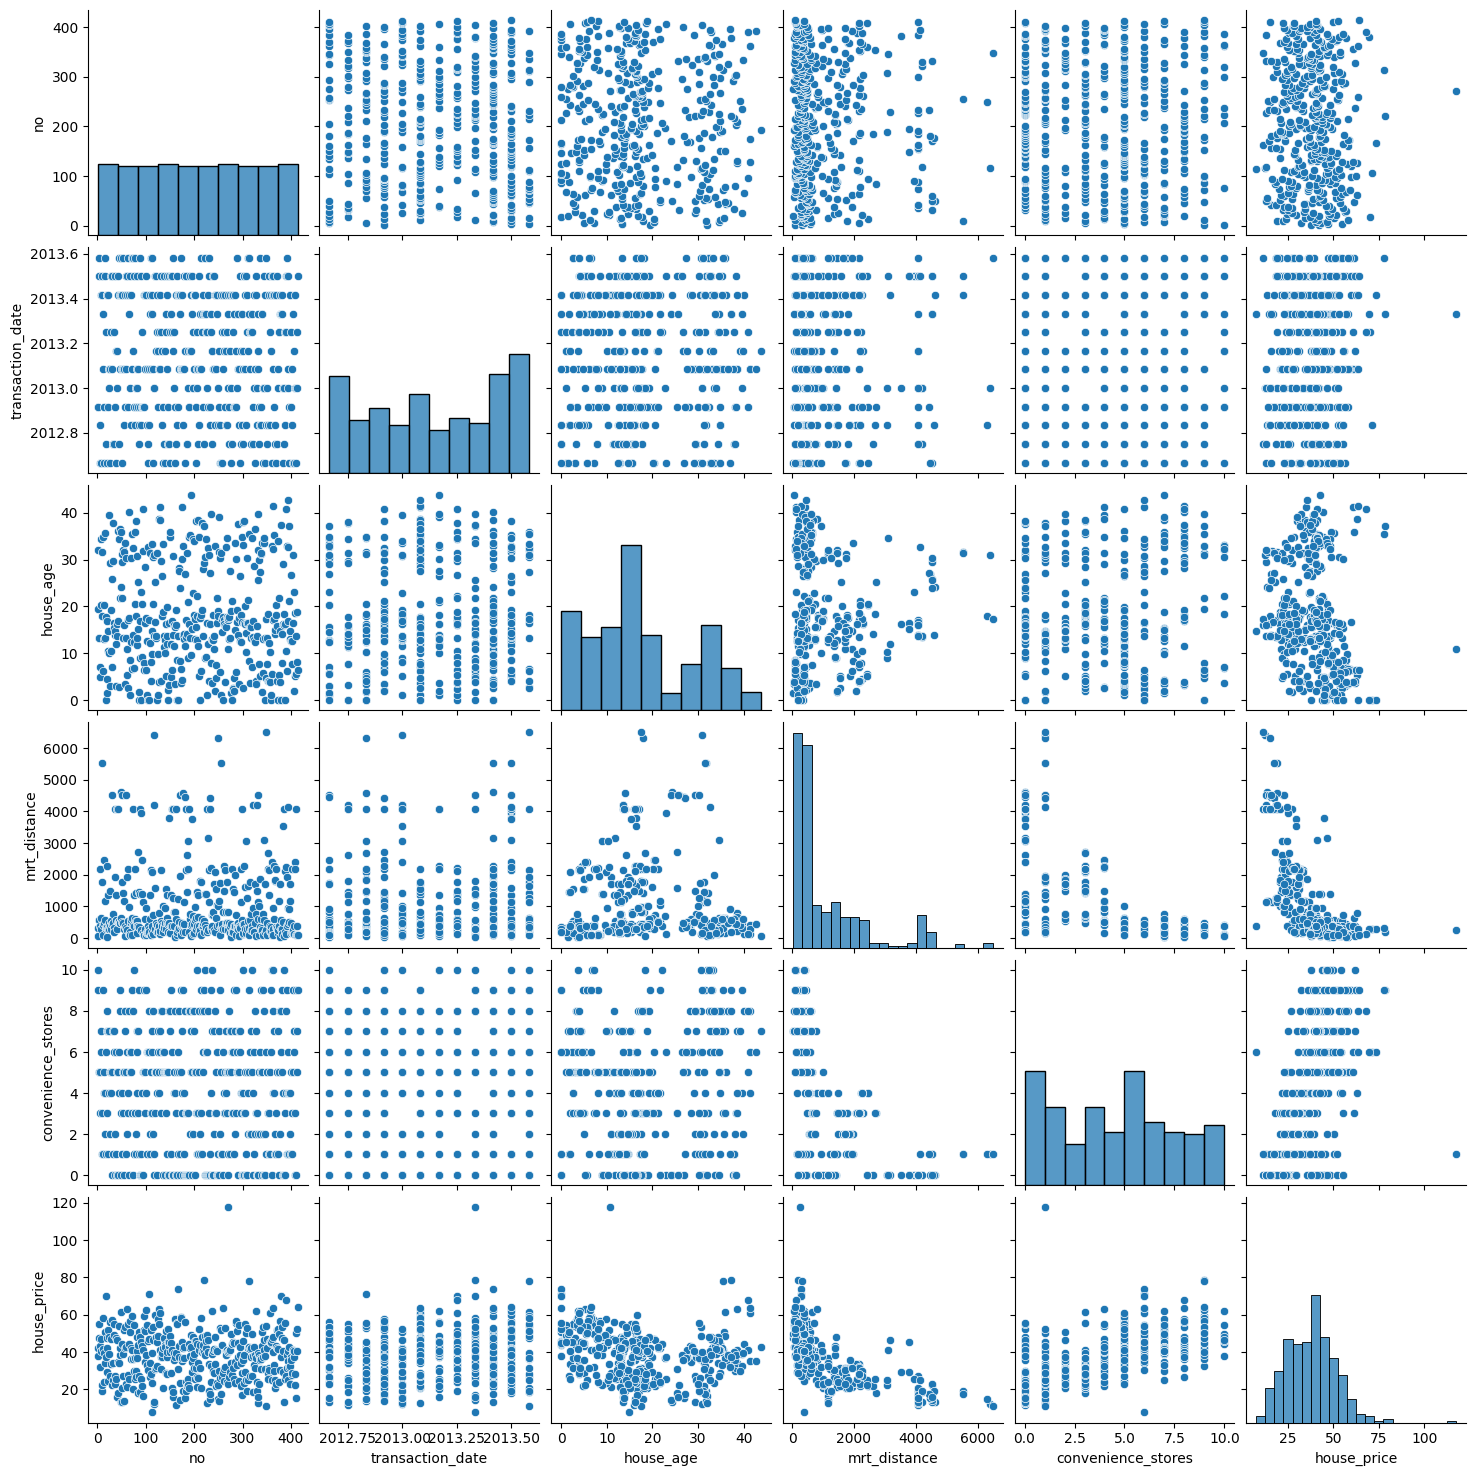

In [95]:
X = df[['convenience_stores', 'house_age', 'mrt_distance']]
Y = df['house_price']

model = LinearRegression().fit(X, Y)

intercept = model.intercept_
coefficients = model.coef_

print(f'house_price = {intercept: .2f} \
     + {coefficients[0]: .2f}* house_age \
     + {coefficients[1]: .2f}* mrt_distance \
      + {coefficients[2]: .2f}* convenience_stores')

predictions= model.predict(X)
print(f"R-squared: {r2_score(Y, predictions)}")
sns.pairplot(df)

In [96]:
pd.set_option('display.precision', 2)
print("1. MRT")
print("2. House Age")
print("3. Convenience Stores")
feature = input("Select feature:")

if feature == '1':
    print("Enter MRT Distance:")
    mrt = input()
    my_float = float(mrt)
    #loop
    while my_float < 23.38284 or my_float > 6488.021:
        print("Invalid MRT Distance!")
        print("Enter MRT Distance:")
        mrt = input()
        my_float = float(mrt)
    #end loop
    price =  45.851427057774984 + -0.007262051618149456 * my_float
    houseprice = round(price, 2)
    print("House Price ", houseprice)

elif feature == '2':
    print("Enter House Age:")
    age = input()
    my_float = float(age)
    #loop
    while my_float < 0 or my_float > 43.8:
        print("Invalid House Age!")
        print("Enter House Age:")
        age = input()
        my_float = float(age)
    #end loop
    price =   42.43469704626289 + -0.2514884190853454 * my_float
    houseprice = round(price, 2)
    print("House Price ", houseprice)

elif feature == '3':
    print("Enter Number of Convenience Stores:")
    store = input()
    my_float = float(store)
    #loop
    while my_float < 0 or my_float > 10:
        print("Invalid Number of Convenience Stores!")
        print("Enter Number of Convenience Stores:")
        store = input()
        my_float = float(store)
    #end loop
    price =  27.181104781472428 + 2.637653463404374 * my_float
    houseprice = round(price, 2)
    print("House Price ", houseprice)

else:
    print("Please choose an existing option.")

1. MRT
2. House Age
3. Convenience Stores
Enter MRT Distance:
Invalid MRT Distance!
Enter MRT Distance:
Invalid MRT Distance!
Enter MRT Distance:
House Price  45.65


1. How did you preprocess the housing dataset?

For our group to preprocess the dataset, our first objectives were to describe, define, and
understand the variables we needed to work on. These variables would be the columns that will
contain the relevant data for the plotting later in the task. After the variables are set, we had to
rename them to the standard convention to cleanly present the data.

2.  What steps did you take to handle missing values and encode categorical variables?
The missing values were obtained by applying the LinearRegression() function. The function allowed
us to obtain the values of the coefficient, and intercept for each variable applied. These values were
then used in the Regression equation together with the variable to find out the value of R-squared.
The value of R-squared is then used to determine the accuracy of the correlation made.

3. What are the interpretations of the coefficients obtained from the linear regression model in
the context of the housing dataset?

The coefficients determine the path and slope of the line as it tries to hit all the plotted areas of the
graph. In the context of the housing dataset, the correlation made using the coeffecients in the
linear regression model will determine the leading factor as to why a house would cost higher or
lower.

4. How did you evaluate the performance of the linear regression model?

We evaluated the performance of the linear regression model based on the value of their R-squared.
The further away from 0 it is, the stronger the correlation. We found out that mrt_distance’s Rsquared value was the furthest from 0, which makes the correlation very strong.

5. What do the evaluation metrics indicate about the model's accuracy?

Based on our observation, the accuracy of the mrt_distance variable was the highest, based on the
value of its R-squared, it being 0.45. The convenience_stores variable came in second with an Rsquared value of 0.32, while the house_age variable was last, with an R-squared value of 0.04.

6. What patterns or deviations did you observe in the visualization of the predicted housing
prices?

During the visualization of the house_age when the line’s slope is drawn, it is observed that the
slope is not very steep, which helps imply the inaccuracy of it as the variable. For mrt_distance, the
slope can be observed as the steepest than the other two. Based on this observation, we believe
the steeper the slope, the more reliable it becomes. Lastly, for convenience_stores, it observed to
have a slope steeper than house_age but less steeper than mrt_distance, hence it only landing
second place.

7. How do these visualizations contribute to your understanding of the model's performance?
The visualizations help us determine which variable is the best to use when utilizing the Linear
Regression. This understanding may benefit us for this type of regression, but because there is also
the multiple regression type, the answers linear regression provides may not necessarily be the best
answer to every question involving regression.

8. Based on your experience in building the linear regression model, what improvements or
enhancements would you suggest to make the predictions more accurate?

We believe that the more data is collected, and the wider the scope of the source of data, the more
accuracy the other variables could build up for their regression. It is also important to recognize
which data is most relevant to the kind of information you are trying to retrieve. In this case, the
distance from the house to the commuting area, the age of the house, and the accessibility for the
inhabitants of the house to the convenience store in a set radius factors in on the quality of livability
achievable by a house, which will determine how expensive renting there would be.